Import packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from soccerplots.radar_chart import Radar

Load data and select top states

In [9]:
data = pd.read_csv("competitiveness data 2016-2017.csv", index_col=0)

#select columns of interest
radar_data = data.iloc[:, -8:]
radar_data = radar_data.sort_values(['IHDI', 'MPI'], ascending=[False, True])

radar_data["Unemployment"] = data['Unemployment'] * 100
radar_data['Accidents/100k persons'] = data['Road Traffic Accidents (2021)']/data.Population * 100000
radar_data['Crimes/100k persons'] = data['Reported Crimes']/data.Population * 100000
# radar_data['Companies/100k persons'] = data['Companies']/data.Population * 100000
radar_data.drop(['Reported Crimes', 'Road Traffic Accidents (2021)'], axis=1, inplace=True)

# shift column 'Name' to first position
# inequality = radar_data.pop('Inequality')
# last_column = radar_data.pop('Avg Food Item Price (Sep 2022)')
last_column = radar_data.pop('IHDI')
  
# insert column using insert(position,column_name,
# first_column) function
# radar_data.insert(7, 'Inequality (%)', inequality*100)
radar_data.insert(7, 'IHDI', last_column)

radar_data.sort_values(by='IHDI', ascending=False, inplace=True)
radar_data

IGR per Capita (2021)  Literacy  Unemployment     MPI  \
STATE                                                                
LAGOS                 58989.393760      92.1     37.143890  0.1023   
FCT                   48816.802800      61.4     40.403511  0.1744   
BAYELSA                5543.013208      62.0     36.684567  0.2272   
AKWA IBOM              6567.509701      66.3     51.003596  0.2448   
EKITI                  4065.314310      74.7     32.207767  0.1154   
DELTA                 15111.252750      65.7     31.143144  0.1169   
CROSS RIVER            5487.945249      62.3     53.650889  0.1598   
RIVERS                17533.510790      70.7     41.592318  0.2232   
ENUGU                  6077.621346      66.5     31.622567  0.1517   
ABIA                   5095.945357      72.5     50.072930  0.1647   
OGUN                  16943.483990      62.8     16.363226  0.1149   
EDO                    9510.401793      62.9     49.023273  0.1440   
IMO                    2467.309755      53.2     56.636102  0.1648   
OSUN                   5157.741349      80.0     11.654413  0.0621   
ONDO                   6204.384430      72.8     17.089386  0.1202   
NASARAWA               7854.220480      41.9     29.829340  0.2374   
KWARA                  8271.231734      49.3     16.551779  0.1612   
ANAMBRA                5520.923481      75.1     44.218937  0.0917   
BENUE                  2177.227132      45.1     11.977324  0.1654   
KOGI                   5634.836959      33.5     38.974001  0.1887   
PLATEAU                4868.471708      46.6     26.588793  0.2921   
TARABA                 2889.038101      23.3     31.548641  0.2819   
EBONYI                 4573.197361      53.0     40.159080  0.2486   
OYO                    6933.272498      45.8     17.987395  0.1521   
ADAMAWA                2867.921613      40.5     54.888906  0.2025   
KADUNA                 6350.059973      29.3     44.347534  0.2082   
NIGER                  2608.210242      37.5     38.802011  0.2666   
GOMBE                  2915.355666      39.3     31.260336  0.3539   
KANO                   2834.497747      48.9     25.358175  0.3313   
BORNO                  3257.918747      14.5     43.246180  0.3143   
JIGAWA                 2432.782727      24.2     38.690848  0.3995   
KEBBI                  1970.773303      25.3     17.252433  0.3539   
ZAMFARA                3569.270410      33.9     12.992528  0.3370   
BAUCHI                 2374.121210      34.1     34.225000  0.3142   
KATSINA                1294.477869      21.7     25.279153  0.3132   
YOBE                   2489.760828      26.6     52.570769  0.3849   
SOKOTO                 4052.915208      30.1     14.478295  0.4531   

             Avg Food Item Price (Sep 2022)  Accidents/100k persons  \
STATE                                                                 
LAGOS                           1043.105723                4.666135   
FCT                             1214.181637               41.332972   
BAYELSA                         1076.763389                2.004406   
AKWA IBOM                       1025.212968                1.527011   
EKITI                            989.680829                4.268146   
DELTA                           1105.285990                4.050839   
CROSS RIVER                     1096.801716                3.473037   
RIVERS                          1168.388303                1.492543   
ENUGU                           1271.972493                6.483022   
ABIA                            1213.248744                2.759021   
OGUN                            1042.608028               20.537317   
EDO                             1200.187957                5.447042   
IMO                             1241.468702                1.993141   
OSUN                             922.077062                9.534157   
ONDO                             919.234883                9.235957   
NASARAWA                         698.878726               33.925491   
KWAR

Score and rank the top states

In [10]:
scored_data = radar_data.copy()
scored_data['Score'] = 1/(5+6+3+4+5+3) * \
    (
        5*(radar_data['IGR per Capita (2021)']/max(radar_data['IGR per Capita (2021)']))\
        +6*radar_data['IHDI']+3*radar_data['Literacy']/100\
        +2*(1 - radar_data['Unemployment']/100) + 4*(1 - radar_data['MPI'])\
            +(1 - radar_data['Avg Food Item Price (Sep 2022)']/max(radar_data['Avg Food Item Price (Sep 2022)']))\
            +(1 - radar_data['Accidents/100k persons']/max(radar_data['Accidents/100k persons']))\
                + (1 - radar_data['Crimes/100k persons']/max(radar_data['Crimes/100k persons']))
)

scored_data.sort_values('Score', ascending = False, inplace=True)
scored_data

IGR per Capita (2021)  Literacy  Unemployment     MPI  \
STATE                                                                
LAGOS                 58989.393760      92.1     37.143890  0.1023   
FCT                   48816.802800      61.4     40.403511  0.1744   
OGUN                  16943.483990      62.8     16.363226  0.1149   
OSUN                   5157.741349      80.0     11.654413  0.0621   
DELTA                 15111.252750      65.7     31.143144  0.1169   
RIVERS                17533.510790      70.7     41.592318  0.2232   
ONDO                   6204.384430      72.8     17.089386  0.1202   
EKITI                  4065.314310      74.7     32.207767  0.1154   
KWARA                  8271.231734      49.3     16.551779  0.1612   
ENUGU                  6077.621346      66.5     31.622567  0.1517   
ANAMBRA                5520.923481      75.1     44.218937  0.0917   
EDO                    9510.401793      62.9     49.023273  0.1440   
BAYELSA                5543.013208      62.0     36.684567  0.2272   
ABIA                   5095.945357      72.5     50.072930  0.1647   
CROSS RIVER            5487.945249      62.3     53.650889  0.1598   
BENUE                  2177.227132      45.1     11.977324  0.1654   
OYO                    6933.272498      45.8     17.987395  0.1521   
AKWA IBOM              6567.509701      66.3     51.003596  0.2448   
PLATEAU                4868.471708      46.6     26.588793  0.2921   
IMO                    2467.309755      53.2     56.636102  0.1648   
KOGI                   5634.836959      33.5     38.974001  0.1887   
NASARAWA               7854.220480      41.9     29.829340  0.2374   
EBONYI                 4573.197361      53.0     40.159080  0.2486   
ADAMAWA                2867.921613      40.5     54.888906  0.2025   
TARABA                 2889.038101      23.3     31.548641  0.2819   
KANO                   2834.497747      48.9     25.358175  0.3313   
KADUNA                 6350.059973      29.3     44.347534  0.2082   
NIGER                  2608.210242      37.5     38.802011  0.2666   
ZAMFARA                3569.270410      33.9     12.992528  0.3370   
GOMBE                  2915.355666      39.3     31.260336  0.3539   
BAUCHI                 2374.121210      34.1     34.225000  0.3142   
KEBBI                  1970.773303      25.3     17.252433  0.3539   
BORNO                  3257.918747      14.5     43.246180  0.3143   
KATSINA                1294.477869      21.7     25.279153  0.3132   
JIGAWA                 2432.782727      24.2     38.690848  0.3995   
SOKOTO                 4052.915208      30.1     14.478295  0.4531   
YOBE                   2489.760828      26.6     52.570769  0.3849   

             Avg Food Item Price (Sep 2022)  Accidents/100k persons  \
STATE                                                                 
LAGOS                           1043.105723                4.666135   
FCT                             1214.181637               41.332972   
OGUN                            1042.608028               20.537317   
OSUN                             922.077062                9.534157   
DELTA                           1105.285990                4.050839   
RIVERS                          1168.388303                1.492543   
ONDO                             919.234883                9.235957   
EKITI                            989.680829                4.268146   
KWARA                            664.813583               12.087324   
ENUGU                           1271.972493                6.483022   
ANAMBRA                         1195.899951                4.767934   
EDO                             1200.187957                5.447042   
BAYELSA                         1076.763389                2.004406   
ABIA                            1213.248744                2.759021   
CROSS RIVER                     1096.801716                3.473037   
BENUE                            681.481024                3.922107   
OYO 

Create function to compare states with a radar chart

In [11]:
def compare_states(data, sec_state, ref_state, **kwargs): 
    """Compare two states in dataset using the parameters available in the dataset

    Args:
        data (DataFrame): DataFrame from which to access the data
        sec_state (str): State to compare against reference
        ref_state (str): Reference state for comparison
    """
    
    ref_color = "red"
    sec_color = "blue"
       
    #get params
    params = list(data.columns)
    params
    
    # add ranges to list of tuple pairs
    ranges = []
    ref_values = []
    sec_values = []

    ranges = [
        (
            min(data[params][i]), 
            max(data[params][i])
            )
            for i in params
    ]

    for x in range(len(data)):
        if data.index[x].upper() == ref_state.upper():
            ref_values = data.iloc[x].values.tolist()
        if data.index[x].upper() == sec_state.upper():
            sec_values = data.iloc[x].values.tolist()
            
    values = [ref_values, sec_values]
    
    # create chart title
    title = dict(
        title_name = sec_state,
        title_color = sec_color,
        title_name_2 = ref_state,
        title_color_2 = ref_color,
        title_fontsize = 18,  
    )

    endnote = 'Created by: Farook Ajose \nData via Natural Bureau of Statistics'


    radar = Radar()

    fig, ax = radar.plot_radar(
        ranges=ranges,
        params=params,
        values=values,
        radar_color=[ref_color, sec_color],
        alphas=[0.5,0.4],
        title=title,
        endnote=endnote,
        compare=True,
    )

How do the top states compare against Lagos?

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\soccerplots\radar_chart.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10), facecolor=self.background_color)


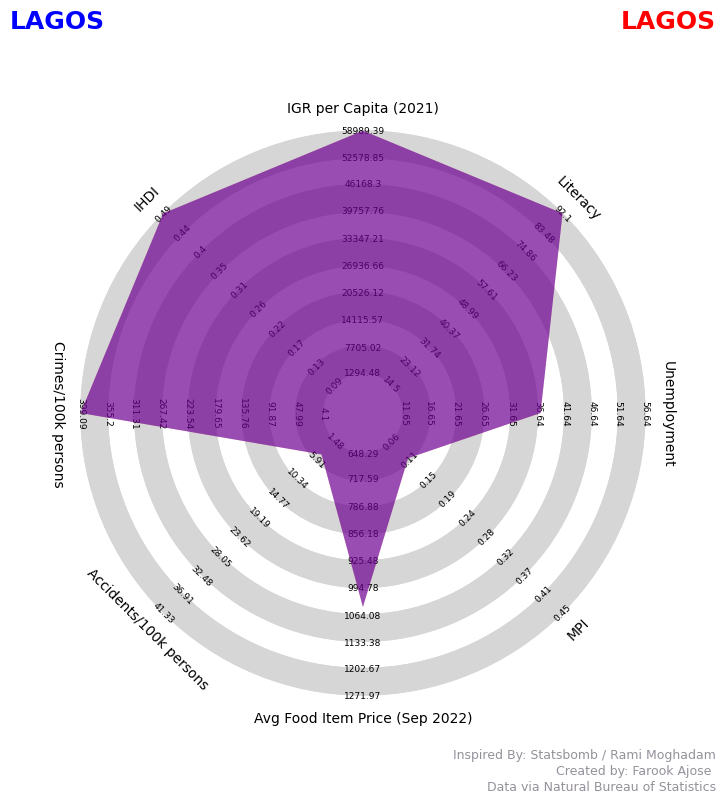

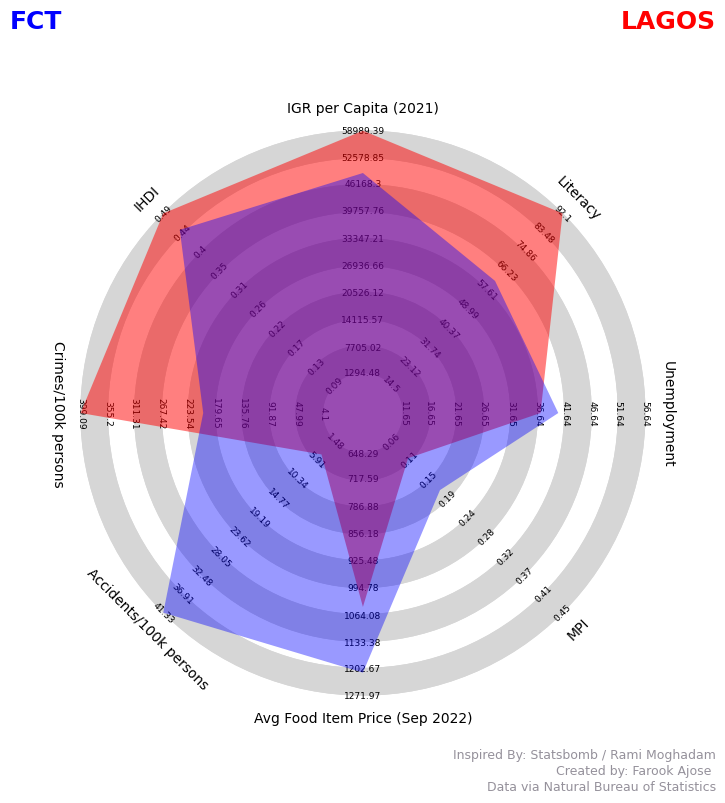

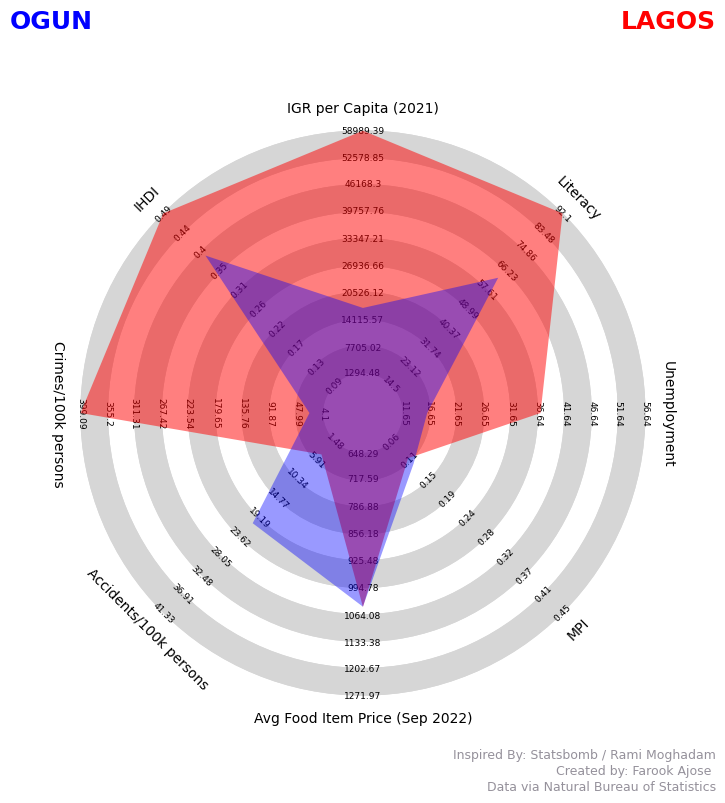

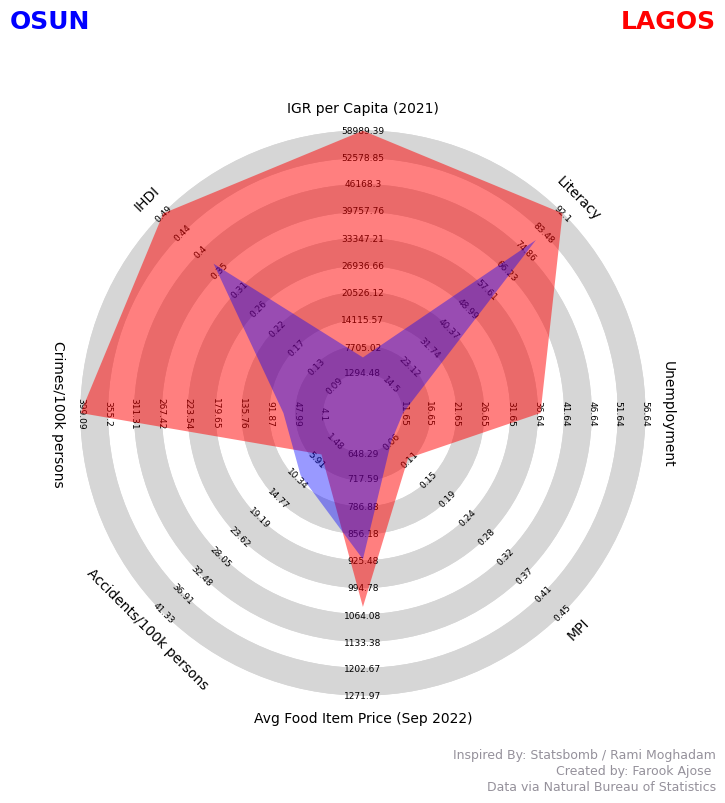

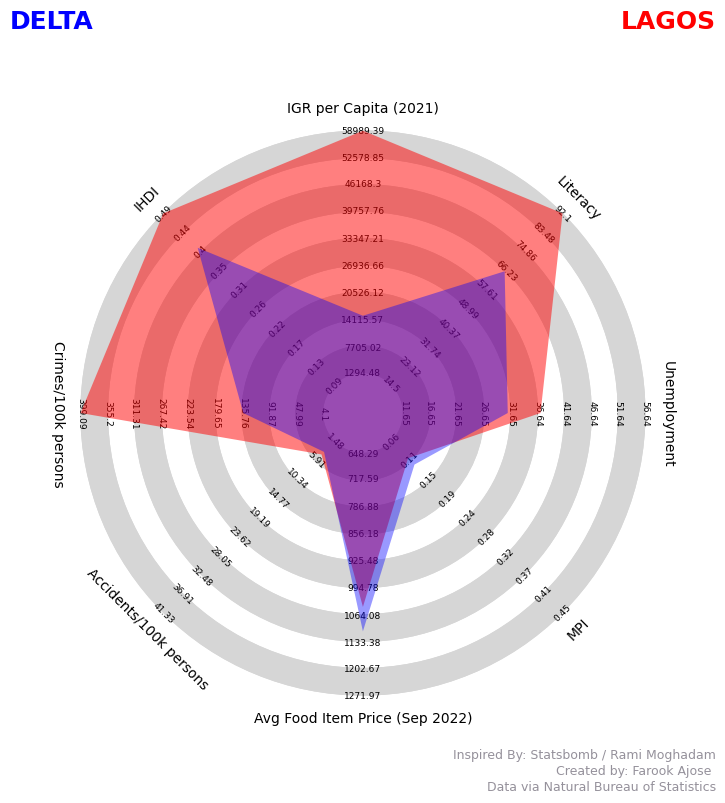

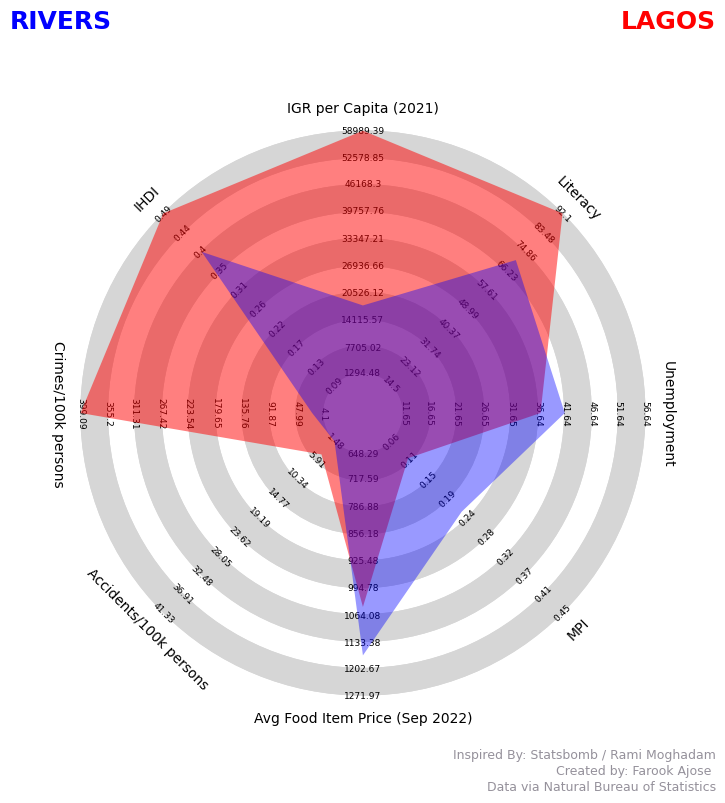

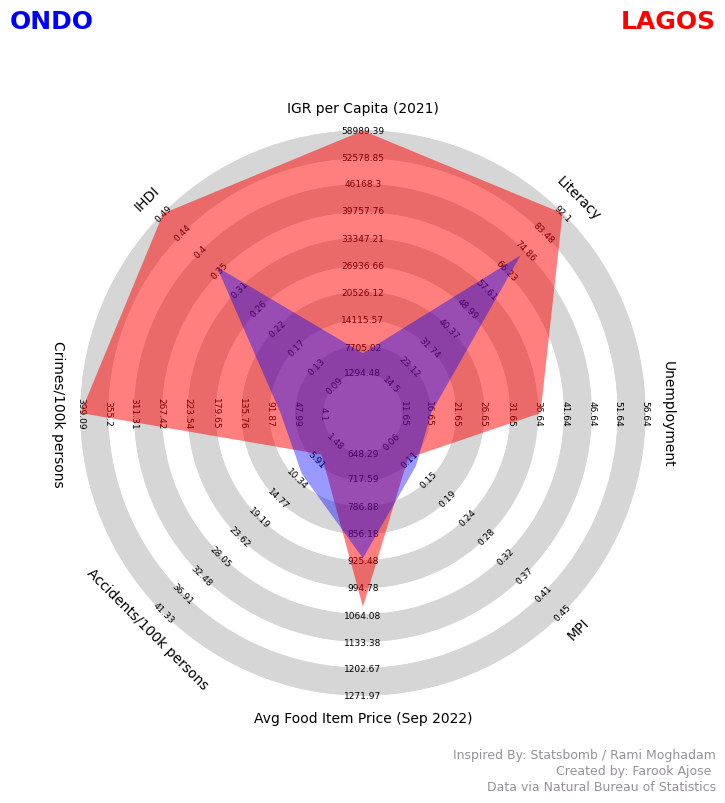

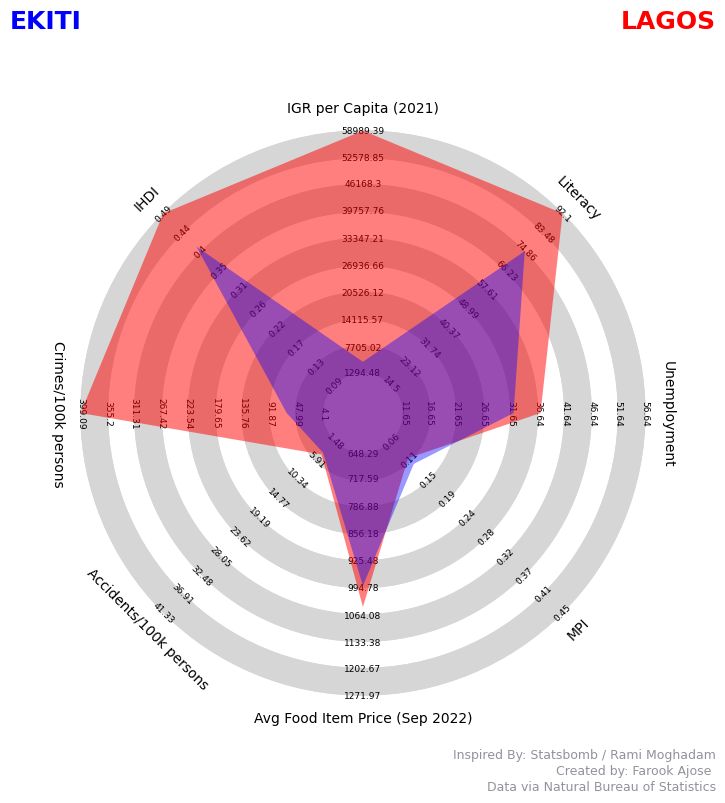

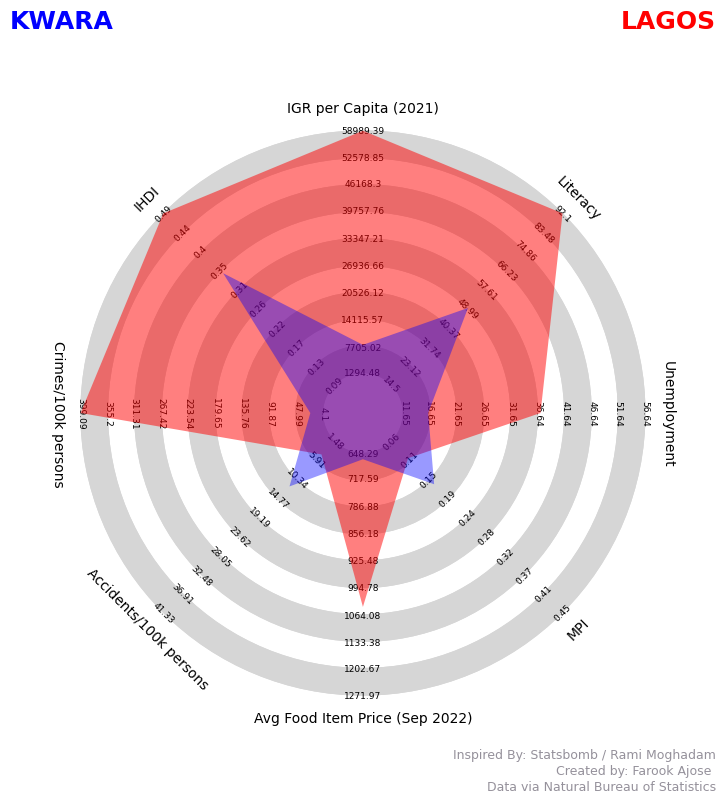

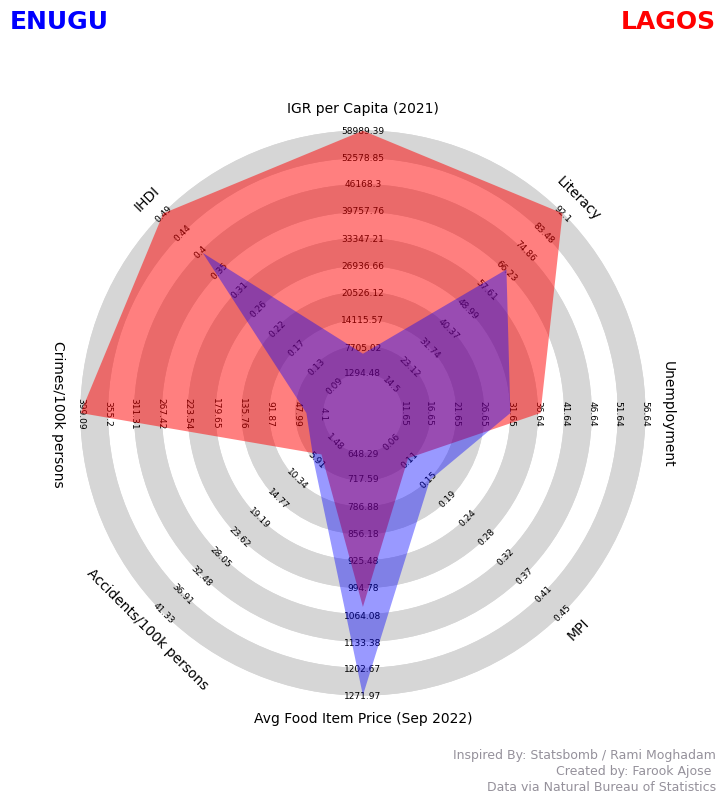

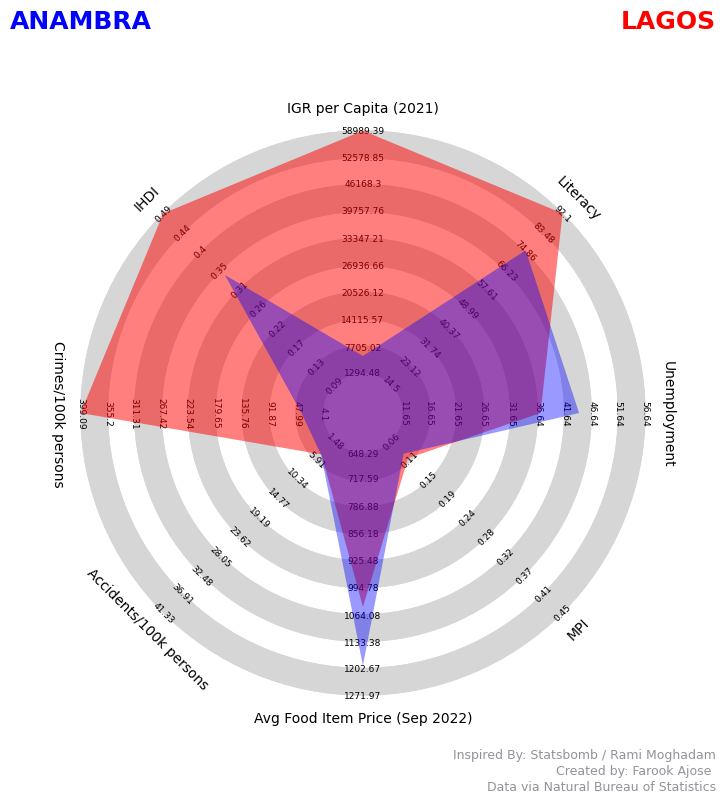

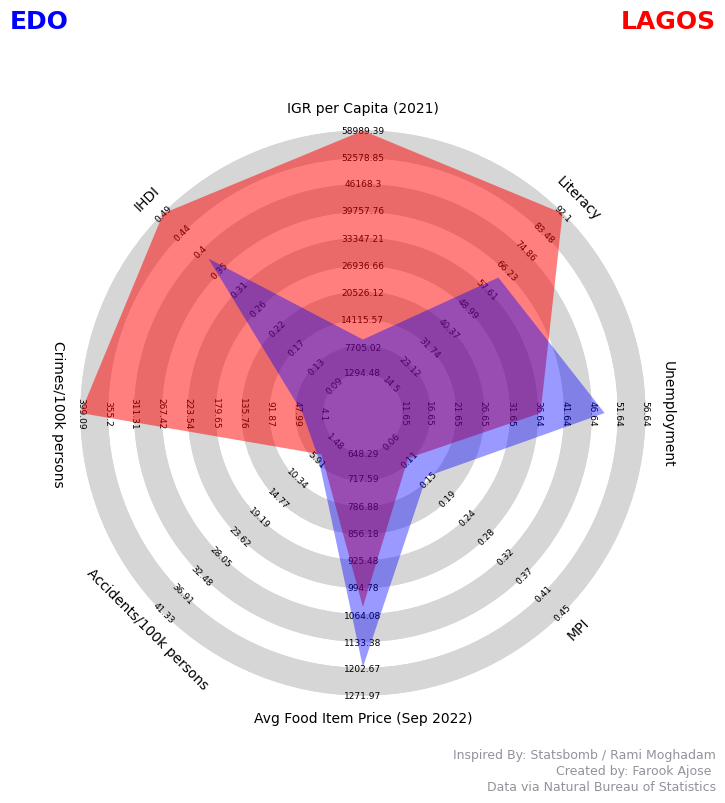

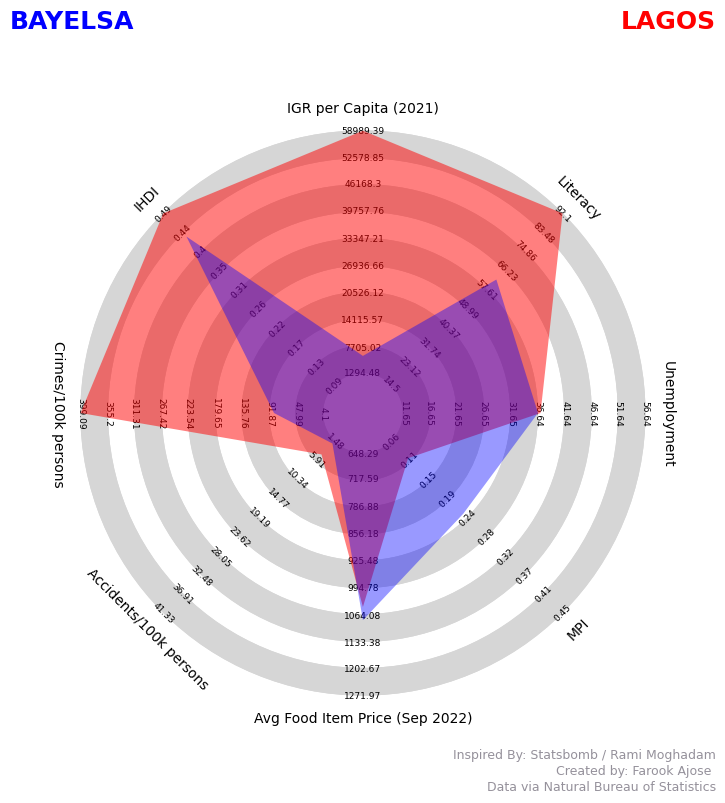

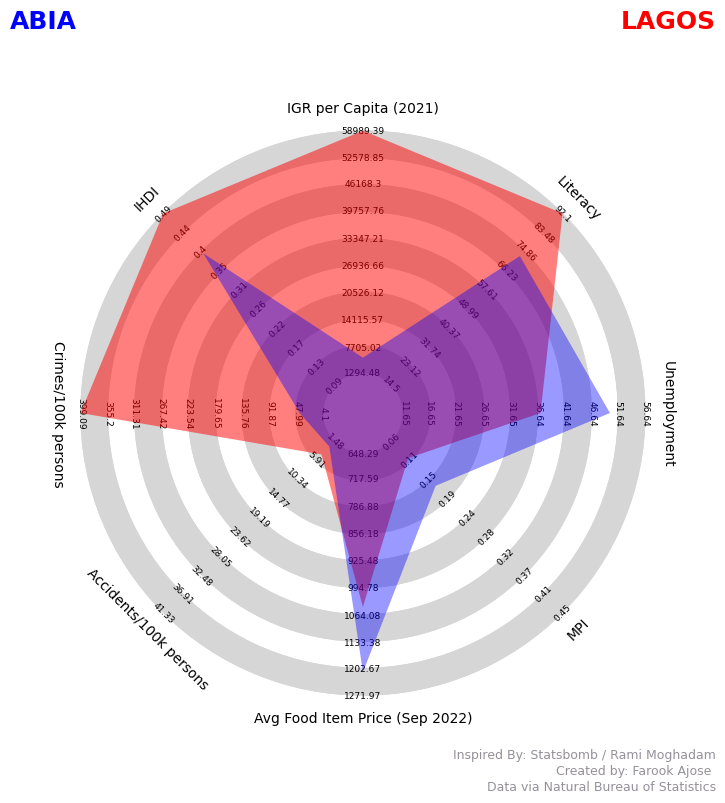

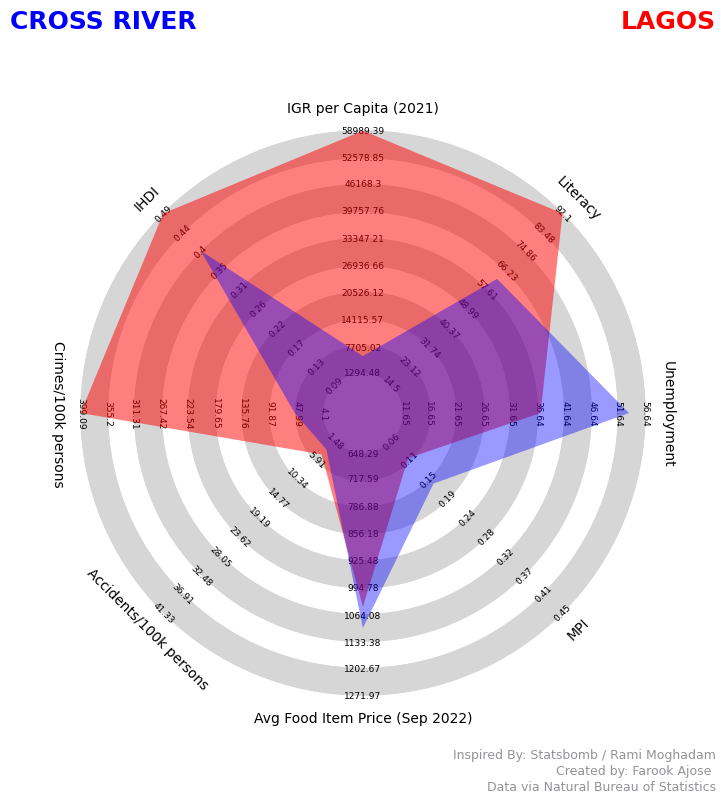

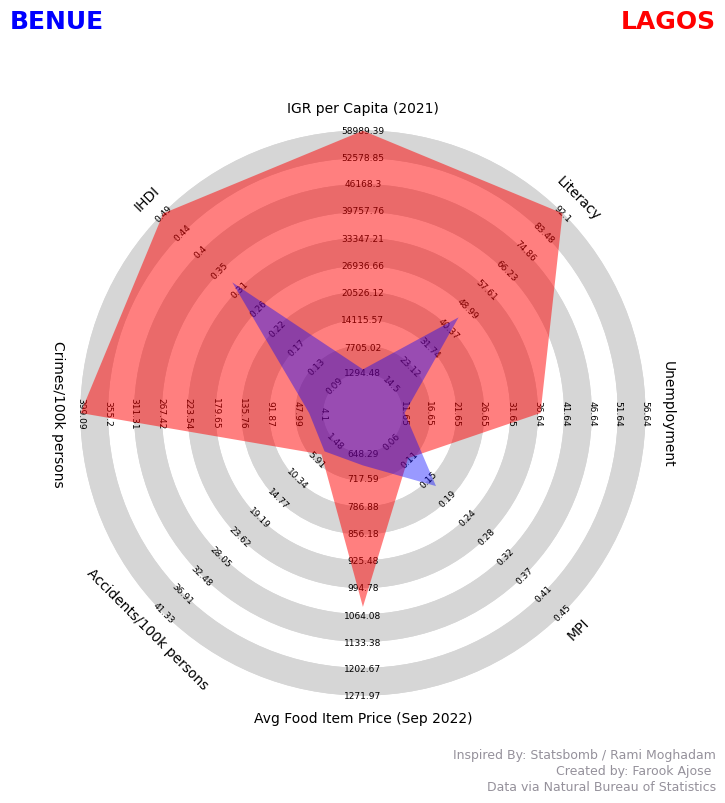

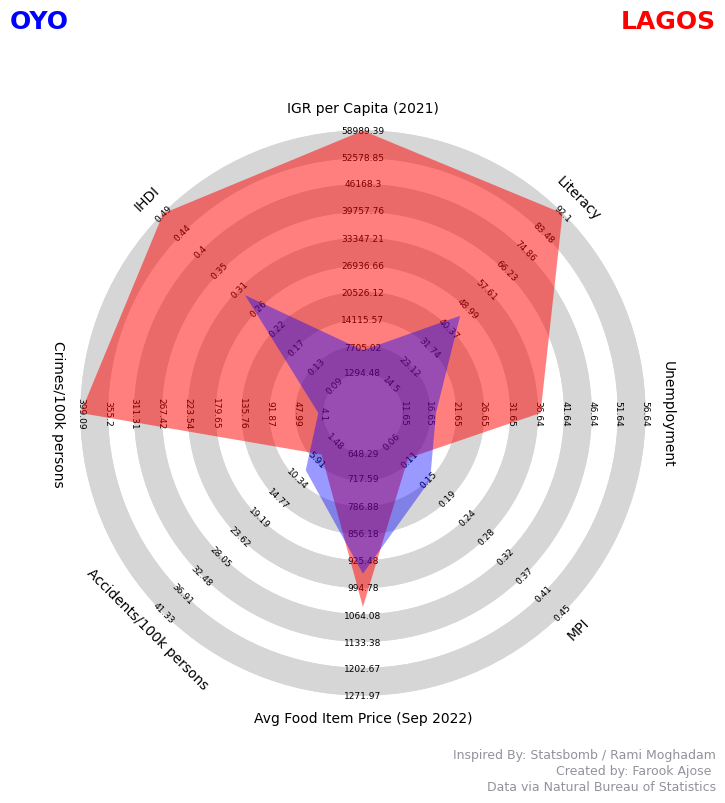

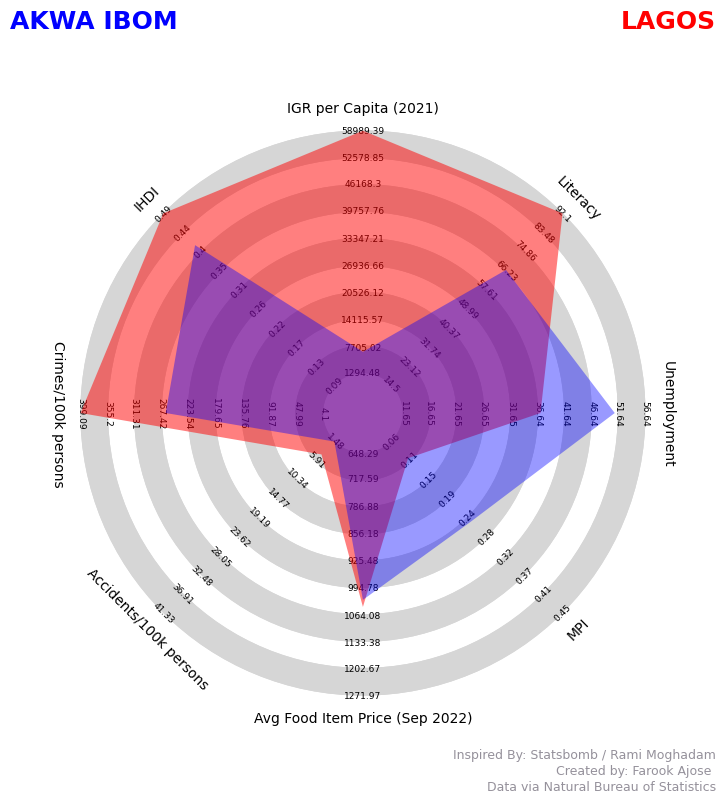

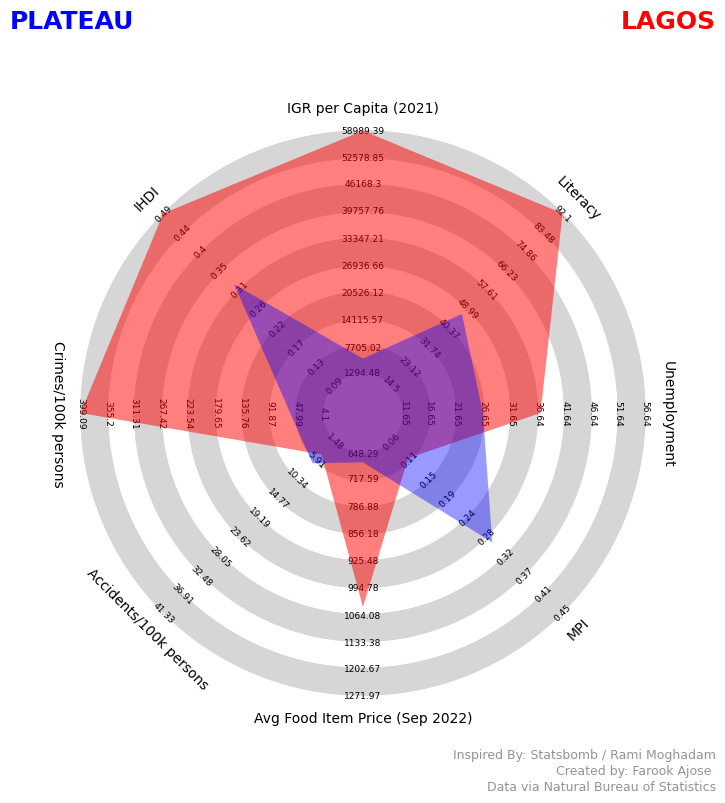

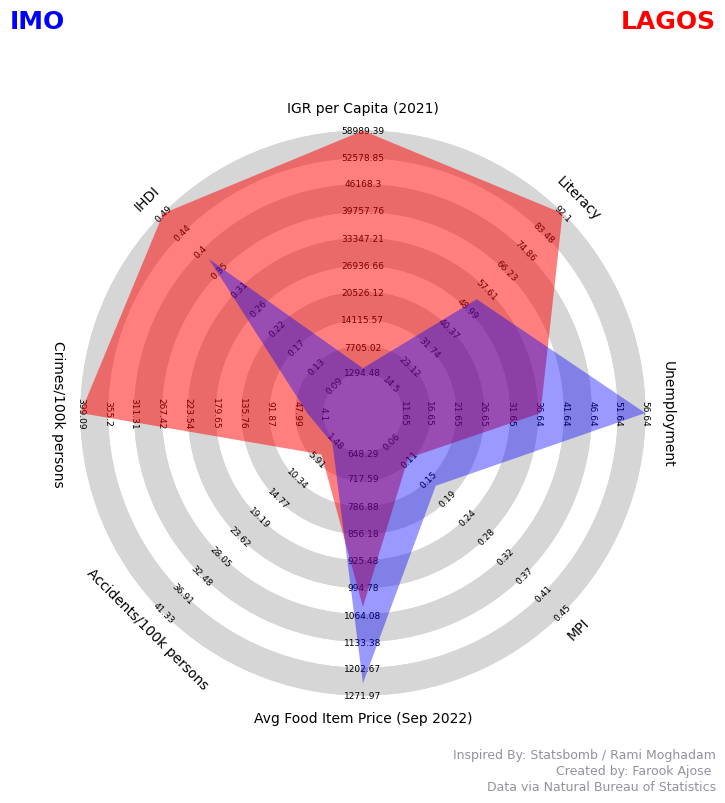

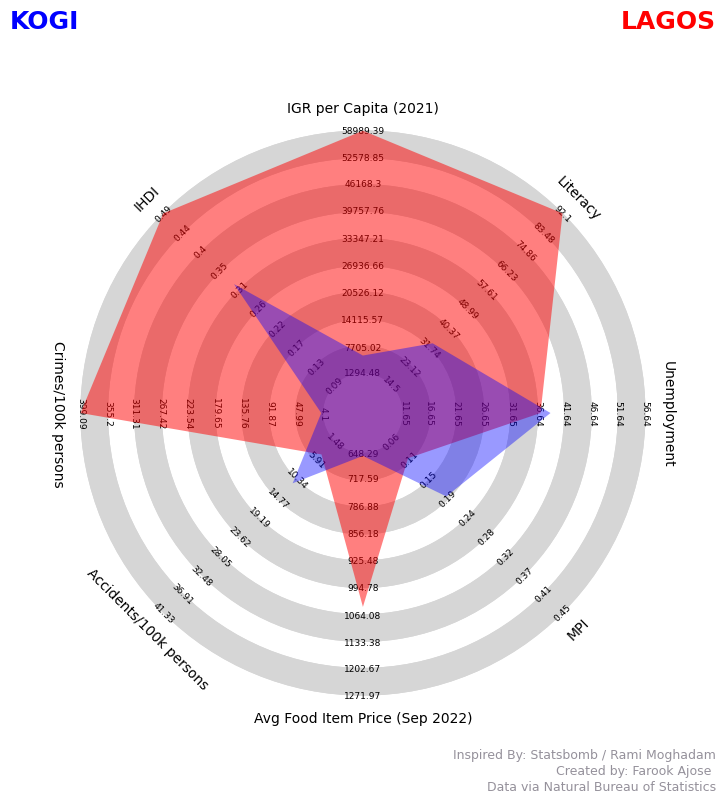

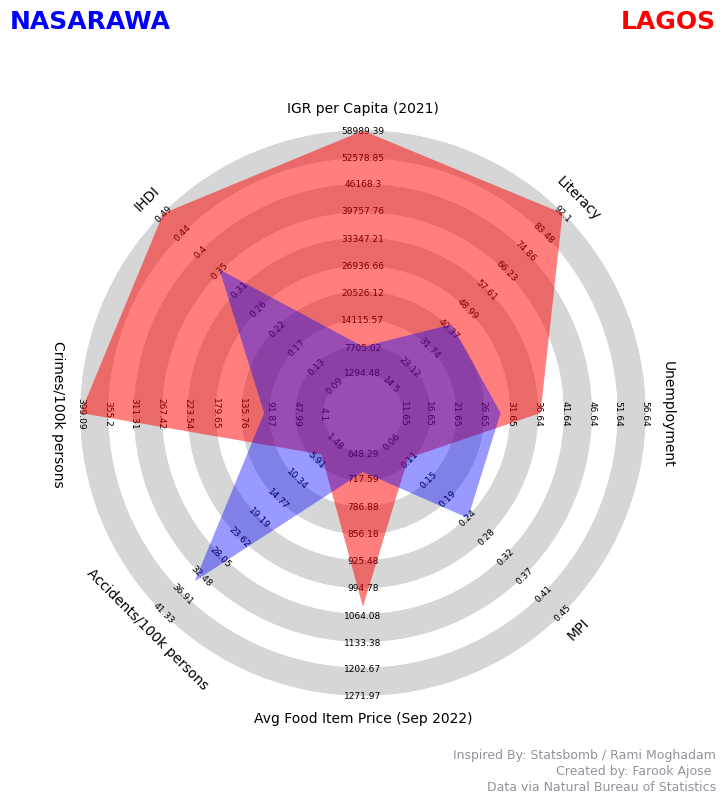

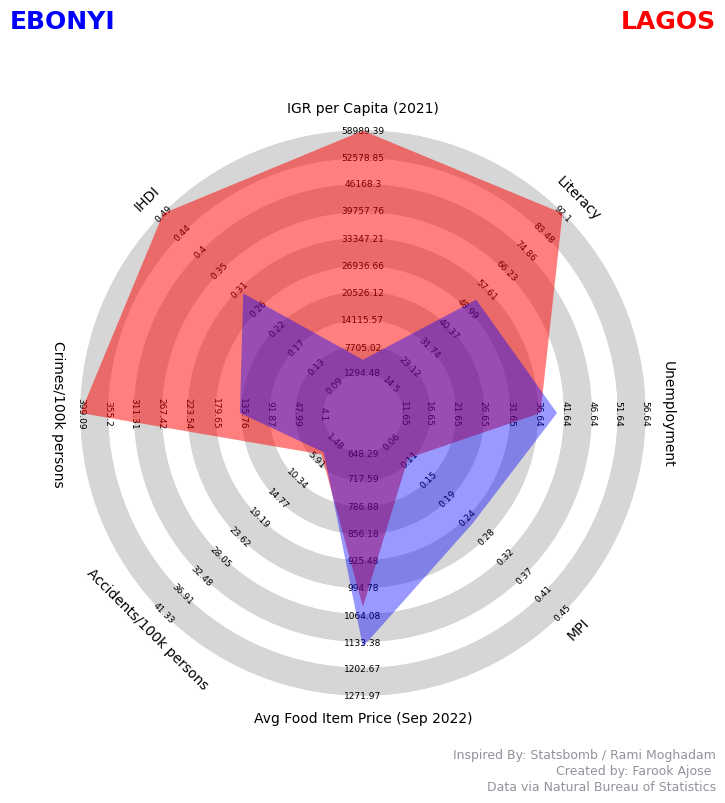

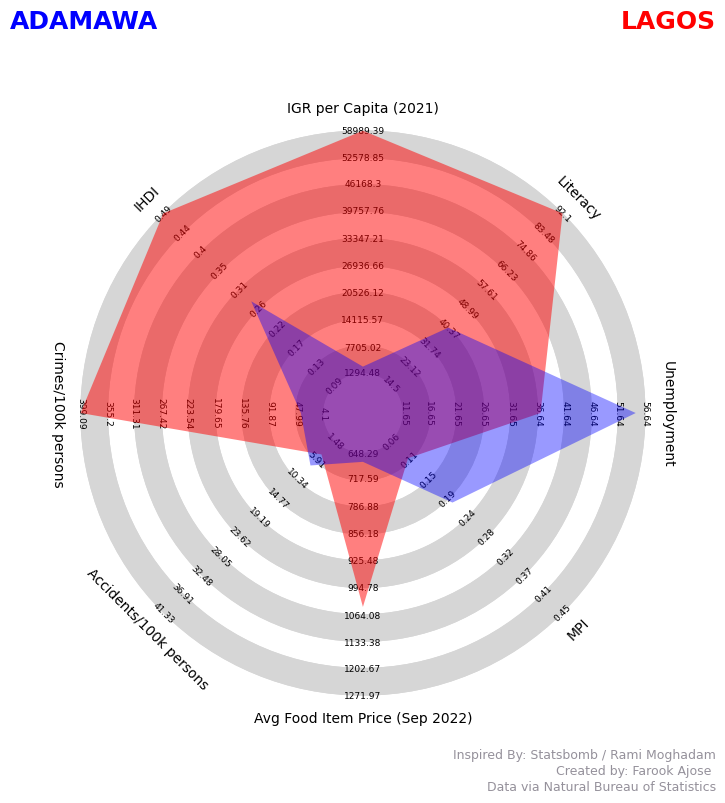

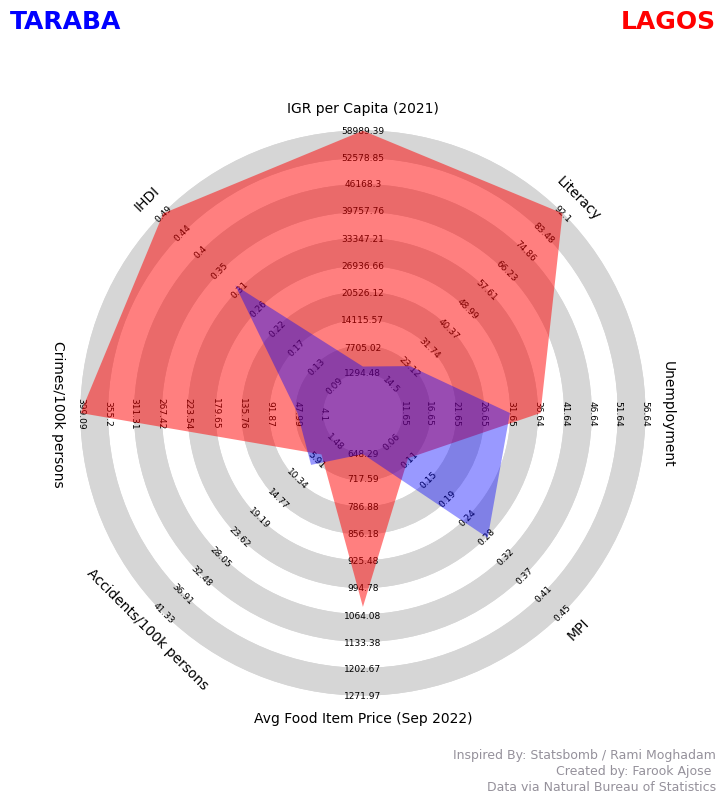

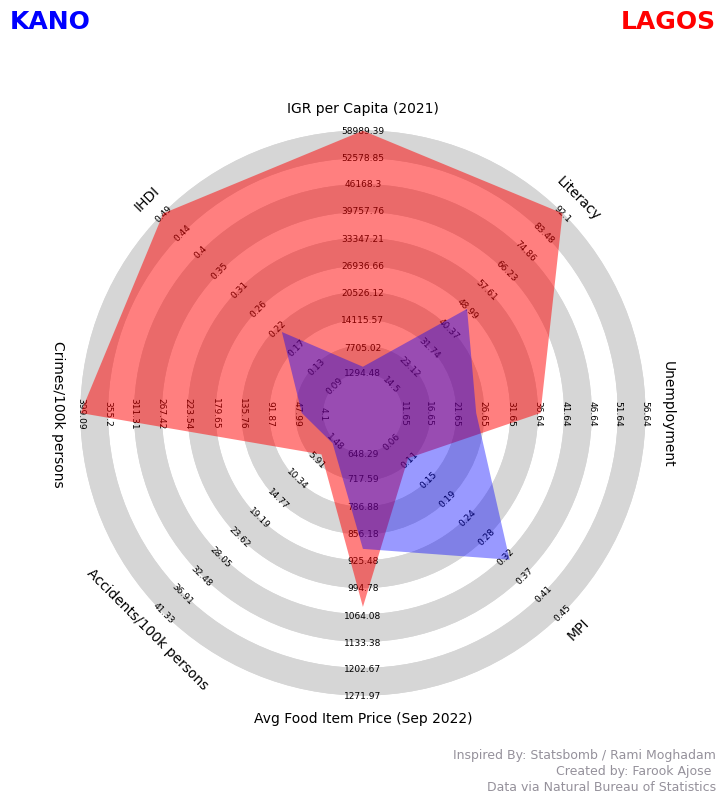

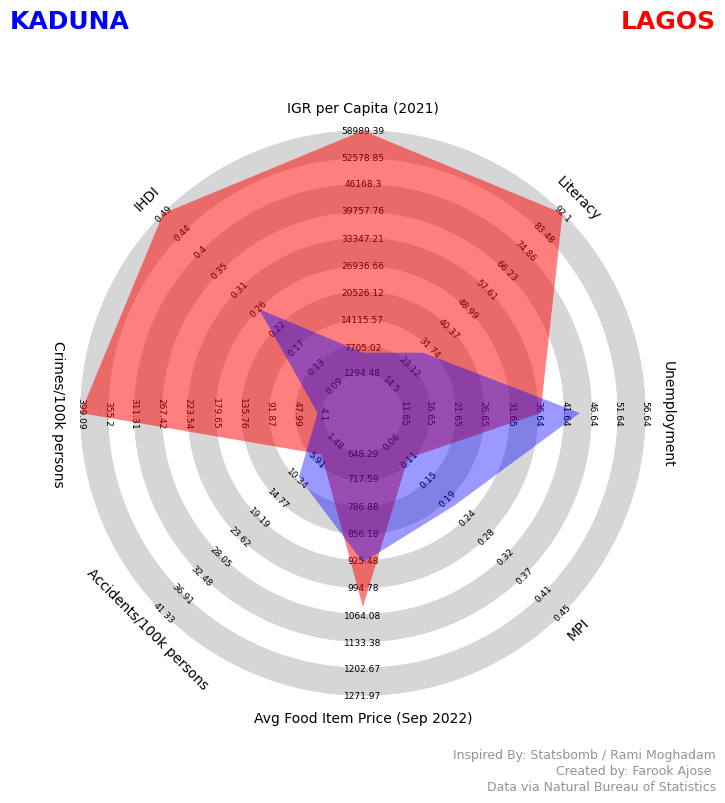

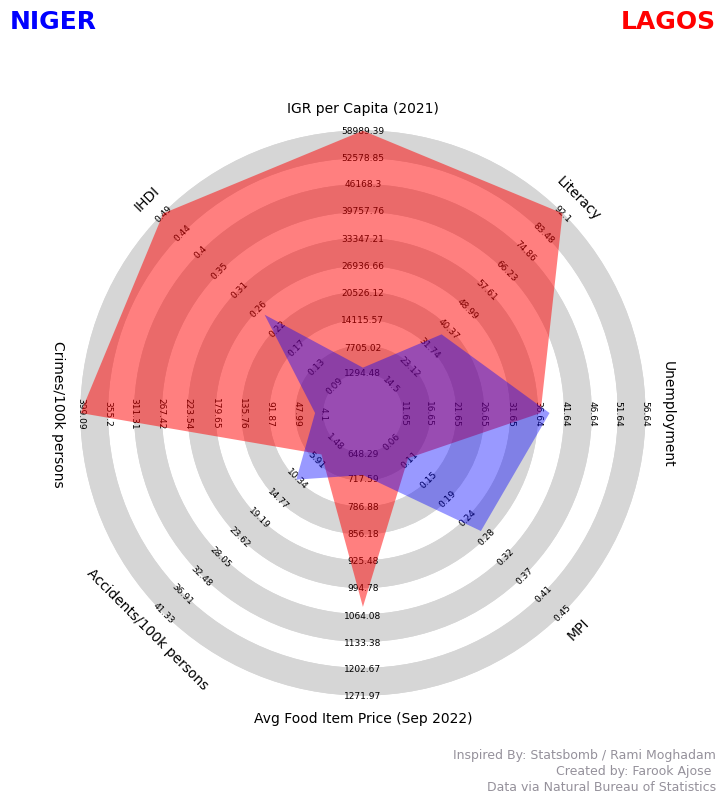

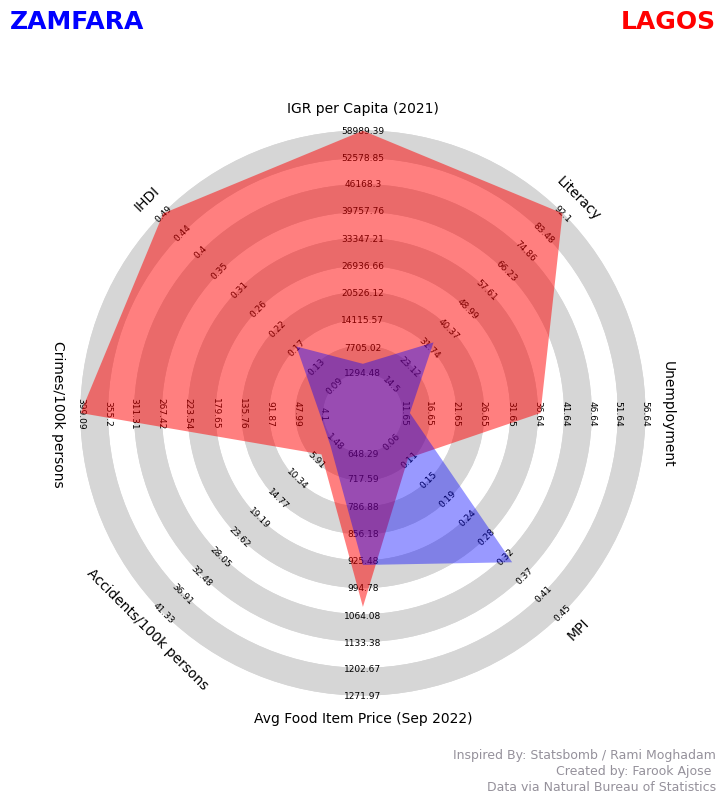

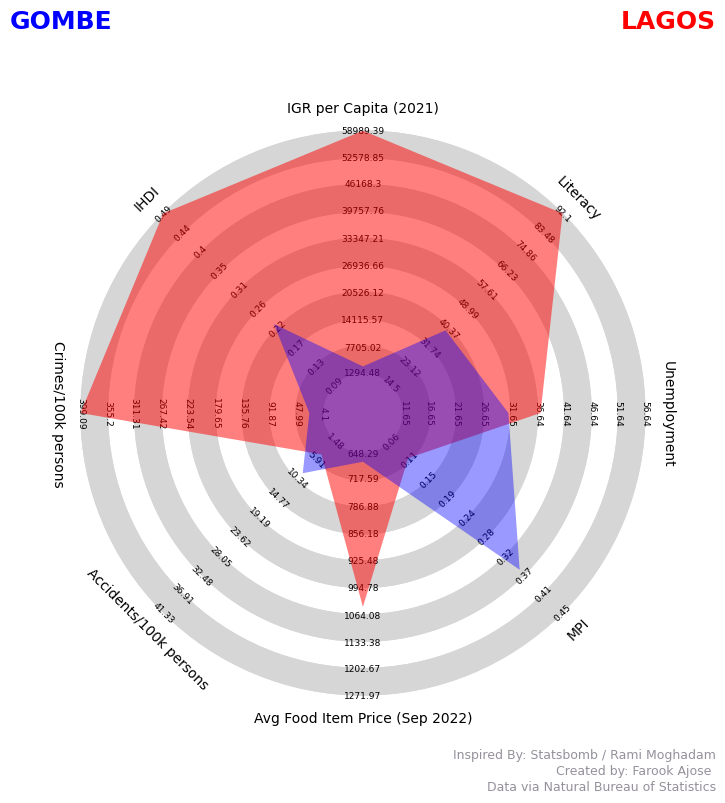

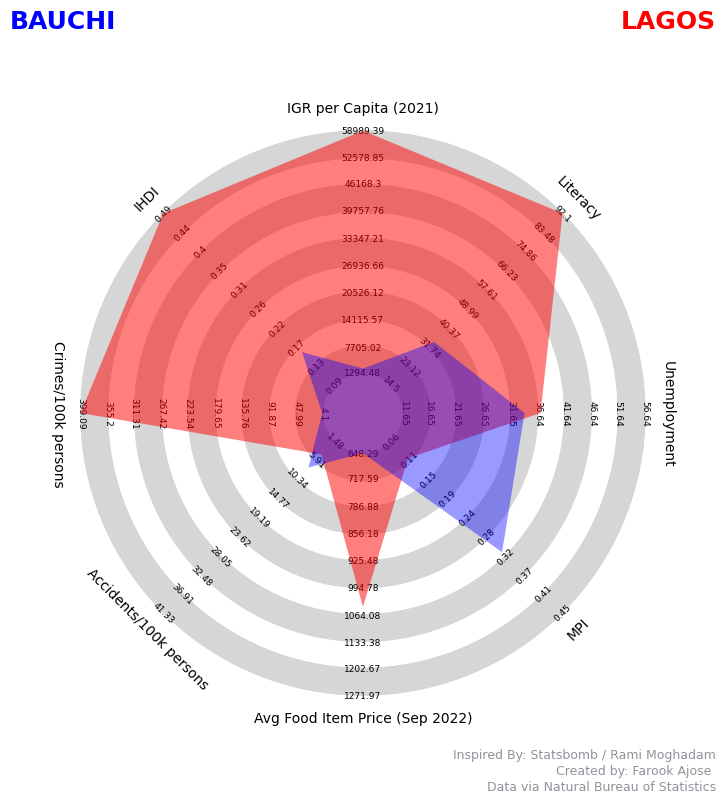

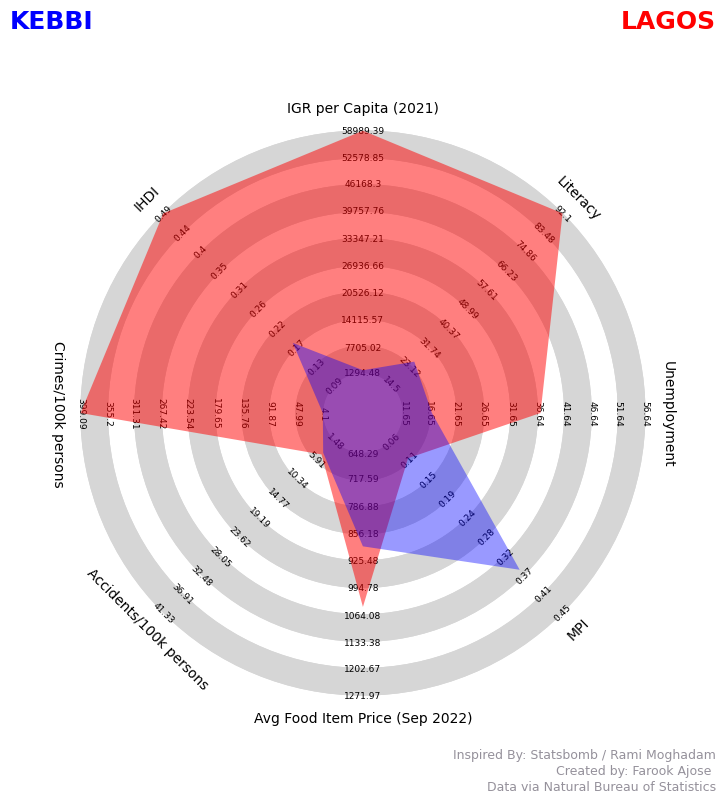

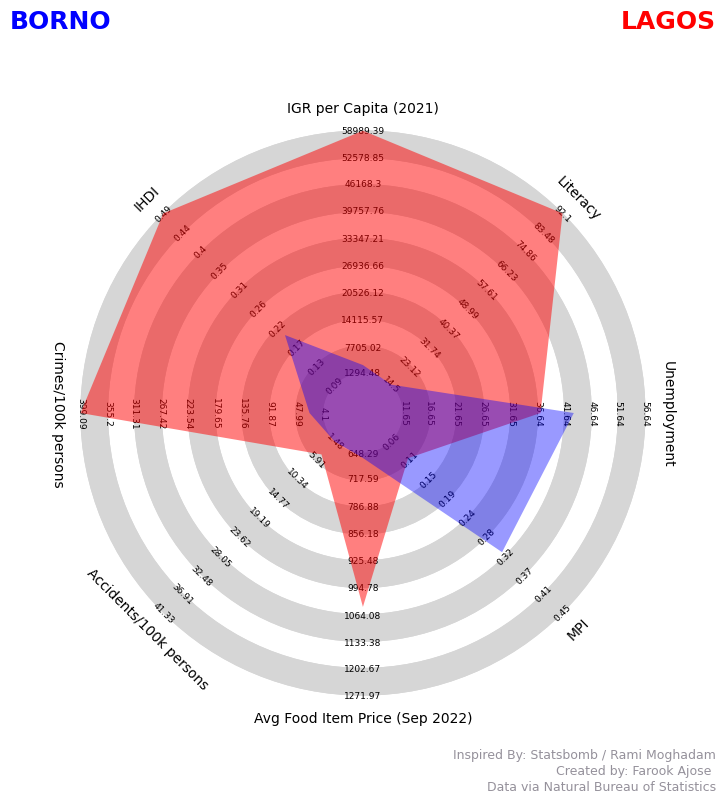

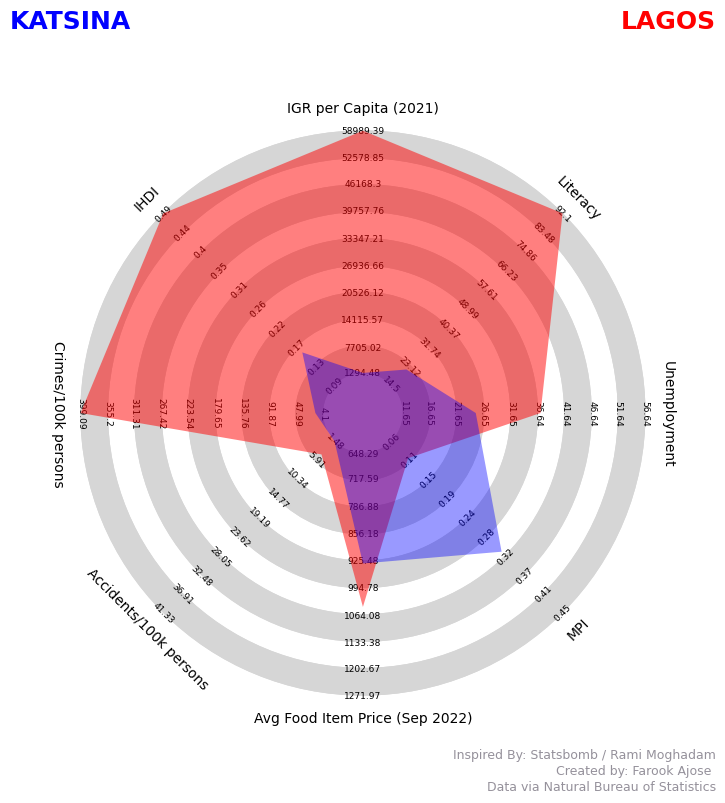

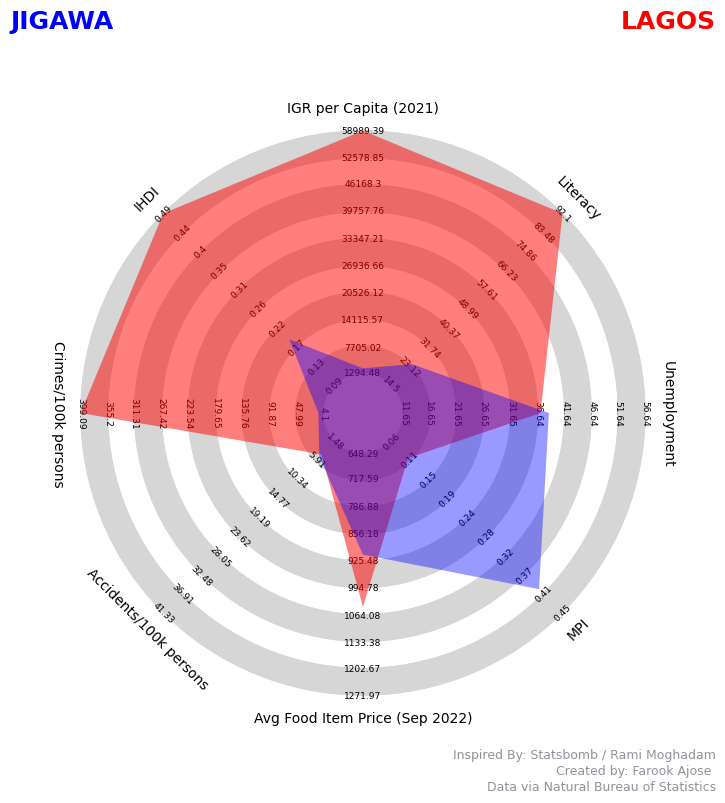

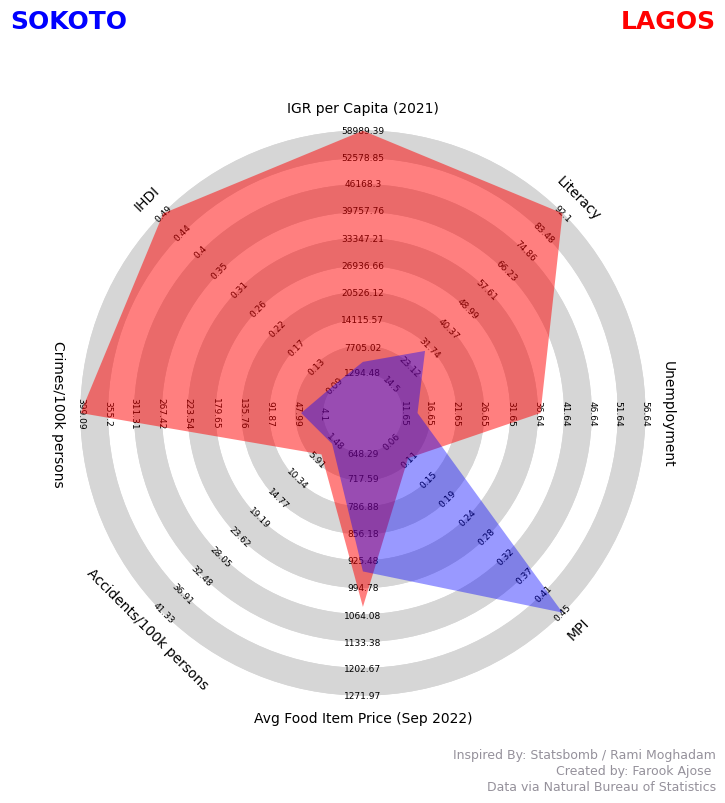

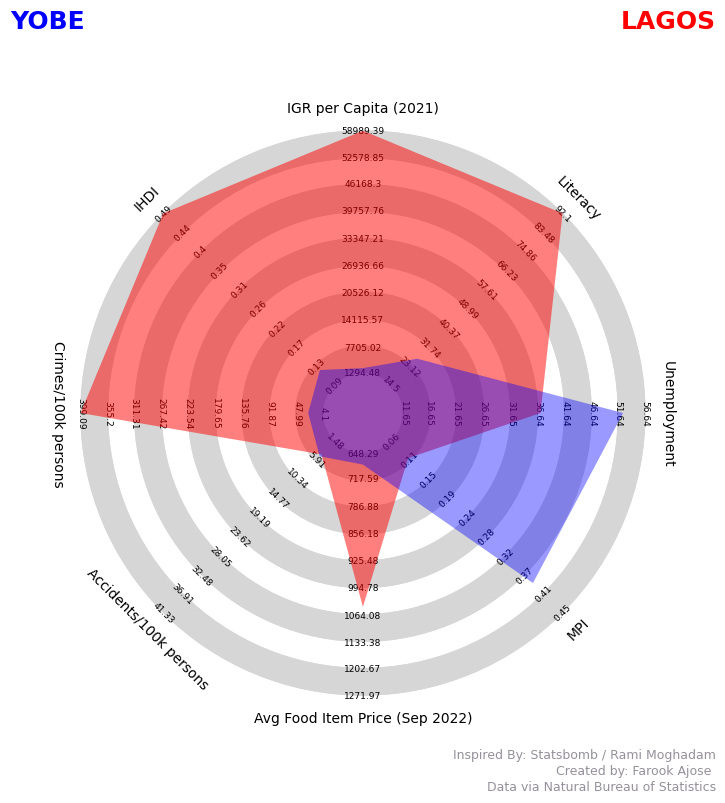

In [12]:
for state in scored_data.index:
    compare_states(radar_data, state, "LAGOS")

In [13]:
# compare_states(radar_data, "Lagos", "Cross River")